## 1. 데이터 불러오기(google drive에 업로드된 파일)

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")
# gdrive파일 만들어서 구글 드라이브에 있는 파일 mount

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# 경로 단축 >> 현재 경로에서 바로 불러올 수 있도록 파일 복사해서 가져오기

import shutil

shutil.copy("/content/gdrive/MyDrive/Colab Notebooks/data/archive.zip", "/content/")


'/content/archive.zip'

In [ ]:
# 압축 파일 풀기

import zipfile

with zipfile.ZipFile("/content/archive.zip","r") as data:
  data.extractall("/content/crack_raw_data/")

In [ ]:
### 데이터 분리 >> train_data, test_data 
      # train_data : test_data = 7:3

import os
import glob
import shutil

from datetime import datetime

start_time = datetime.now()

## data 폴더 만들기
data_root_dir = "/content/crack_raw_data/"
label_name = os.listdir(data_root_dir)

root_dir = "/content/crack_data/"

if os.path.exists(root_dir):
  shutil.rmtree(root_dir)
  print(root_dir + " is deleted")

if not os.path.exists(root_dir):
  os.mkdir(root_dir)
  print(root_dir + " is created")


# train 폴더 만들기
if os.path.exists(root_dir+"train/"):
  shutil.rmtree(root_dir+"train/")
  print(root_dir+"train/ is deleted")


# test 폴더 만들기
if os.path.exists(root_dir+"test/"):
  shutil.rmtree(root_dir+"test/")
  print(root_dir+"test/ is deleted")

if not os.path.exists(root_dir+"test/"):
  os.mkdir(root_dir+"test/")
  print(root_dir + "test/ is created")


# train폴더로 전체 데이터 복사하기
shutil.copytree(data_root_dir, root_dir+"train/")


# test 폴더에 Negative/Positive 파일 만들어주기
for label in label_name:
  os.mkdir(root_dir+"test/"+label.strip())
  print(root_dir+"test/"+label.strip()+" is created")


## test 데이터 분리하기

train_dir = root_dir + "train/"
test_dir = root_dir + "test/"

#for label in label_name:
train_image_list_Negative = glob.glob(train_dir + "Negative/*")
print("total {} image file nums : {}".format("Negative", len(train_image_list_Negative)))

train_image_list_Positive = glob.glob(train_dir + "Positive/*")
print("total {} image file nums : {}".format("Negative", len(train_image_list_Positive)))

# train 폴더에 있던 image list 섞어주기
import random
random.shuffle(train_image_list_Negative)
print("데이터 shuffle_Negative")
random.shuffle(train_image_list_Positive)
print("데이터 shuffle_Positive")

# test 데이터 분리
ratio = 0.3

# 각각 분리할 개수 정하기
split_image_num_positive = int(ratio * len(train_image_list_Positive))
print("분리할 개수(Positive) : ", split_image_num_positive)
split_image_num_negative = int(ratio * len(train_image_list_Negative))
print("분리할 개수(Negative) : ", split_image_num_negative)

test_image_list_Positive = train_image_list_Positive[0:split_image_num_positive]
test_image_list_Negative = train_image_list_Negative[0:split_image_num_negative]

# 각 test 데이터 이동

move_nums = 0
for test_image in test_image_list_Positive:
  shutil.move(test_image, test_dir+"Positive")
  move_nums = move_nums+1
print("file move nums_Positive : ", move_nums)
print("--------------------------------------------")

move_nums = 0
for test_image in test_image_list_Negative:
  shutil.move(test_image, test_dir+"Negative")
  move_nums = move_nums+1
print("file move nums_Negative : ", move_nums)
print("--------------------------------------------")

end_time = datetime.now()

print("elapsed time : ", end_time-start_time)

/content/crack_data/ is deleted
/content/crack_data/ is created
/content/crack_data/test/ is created
/content/crack_data/test/Positive is created
/content/crack_data/test/Negative is created
total Negative image file nums : 20000
total Negative image file nums : 20000
데이터 shuffle_Negative
데이터 shuffle_Positive
분리할 개수(Positive) :  6000
분리할 개수(Negative) :  6000
file move nums_Positive :  6000
--------------------------------------------
file move nums_Negative :  6000
--------------------------------------------
elapsed time :  0:00:06.493850


In [ ]:
### 잘 나눠졌는지 검증
src_root_dir = "/content/crack_data/train/"
dst_root_dir = "/content/crack_data/test/"

# 카테고리 개수(정답 폴더 개수)가 정확히 맞는지 확인
train_label_name_list = os.listdir(src_root_dir)
test_label_name_list = os.listdir(dst_root_dir)

# 정답 이름이 서로 같은지도 확인
train_label_name_list.sort()
test_label_name_list.sort()

if train_label_name_list != test_label_name_list:
    print("fatal error !!!!!")
else:
    print(len(train_label_name_list))
    print(len(test_label_name_list)) 

2
2


In [ ]:
### 이미지 데이터 가져오기

## TRAIN
import os
import glob
import cv2
from datetime import datetime

image_list = []
label_list = []

image_dir = "/content/crack_data/train/"
#label_list = os.listdir(image_dir)

start_time = datetime.now()

file_path = image_dir + "Positive"
img_file_list = glob.glob(file_path+"/*.jpg")

for img_file in img_file_list:
  src_img = cv2.imread(img_file, cv2.IMREAD_COLOR)
  src_img = cv2.resize(src_img, dsize=(64,64))
  src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)
  image_list.append(src_img)
  label_list.append("Positive")

end_time = datetime.now()
print("elapsed time : ", end_time-start_time)

elapsed time :  0:00:09.431619


In [ ]:
start_time = datetime.now()

file_path = image_dir + "Negative"
img_file_list = glob.glob(file_path+"/*.jpg")

for img_file in img_file_list:
  src_img = cv2.imread(img_file, cv2.IMREAD_COLOR)
  src_img = cv2.resize(src_img, dsize=(64,64))
  src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)
  image_list.append(src_img)
  label_list.append("Negative")

end_time = datetime.now()
print("elapsed time : ", end_time-start_time)

elapsed time :  0:00:09.773838


In [ ]:
import numpy as np
X_train = np.array(image_list).astype("float32")
y_train = np.array(label_list)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)

print(X_train.shape, y_train.shape)

(28000, 64, 64, 3) (28000,)


In [ ]:
## TEST

import os
import glob
import cv2
from datetime import datetime

image_list = []
label_list = []

image_dir = "/content/crack_data/test/"
#label_list = os.listdir(image_dir)

start_time = datetime.now()


file_path = image_dir + "Positive/"
img_file_list = glob.glob(file_path+"/*.jpg")

for img_file in img_file_list:
  src_img = cv2.imread(img_file, cv2.IMREAD_COLOR)
  src_img = cv2.resize(src_img, dsize=(64,64))
  src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)
  image_list.append(src_img)
  label_list.append("Positive")

end_time = datetime.now()
print("elapsed time : ", end_time-start_time)

elapsed time :  0:00:04.333749


In [ ]:
start_time = datetime.now()


file_path = image_dir + "Negative/"
img_file_list = glob.glob(file_path+"/*.jpg")

for img_file in img_file_list:
  src_img = cv2.imread(img_file, cv2.IMREAD_COLOR)
  src_img = cv2.resize(src_img, dsize=(64,64))
  src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)
  image_list.append(src_img)
  label_list.append("Negative")

end_time = datetime.now()
print("elapsed time : ", end_time-start_time)

elapsed time :  0:00:04.177589


In [ ]:
import numpy as np
X_test = np.array(image_list).astype("float32")
y_test = np.array(label_list)

In [ ]:
y_test = le.transform(y_test)

print(X_test.shape, y_test.shape)

(12000, 64, 64, 3) (12000,)


In [ ]:
## 정규화 (최대최소)
X_train = X_train/255.0
X_test = X_test/255.0

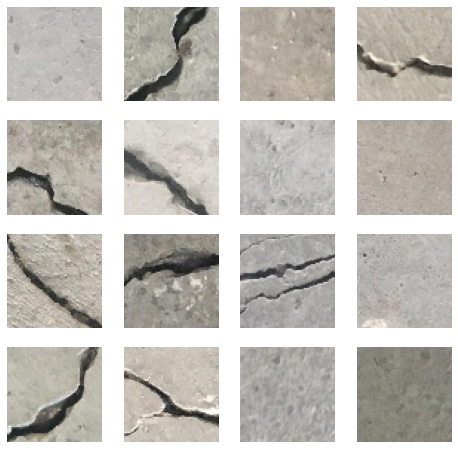

In [ ]:
## 이미지 확인

import matplotlib.pyplot as plt

rnd_idx = np.random.randint(0, len(X_train), 16)


plt.figure(figsize=(8,8))
for i in range(len(rnd_idx)):
    plt.subplot(4,4, i+1)
    plt.axis("off")
    plt.imshow(X_train[rnd_idx[i]])

In [ ]:
## 필요한 module import 
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Input, concatenate, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.utils import to_categorical

In [ ]:
model = Sequential()

model.add(Conv2D(input_shape=(64,64,3), kernel_size=3, filters=64, strides=(1,1), padding="SAME", activation="relu"))
model.add(Conv2D(kernel_size=3, filters=64, strides=(1,1), padding="SAME", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), padding="SAME"))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation="relu", kernel_initializer="he_normal"))
model.add(Dropout(0.25))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(2, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1792      
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 32, 32, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 65536)             0         
                                                                 
 dense_3 (Dense)             (None, 64)                4194368   
                                                      

In [ ]:
import tensorflow as tf
stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)
reduce = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3)

In [ ]:
from datetime import datetime
start_time = datetime.now()
result = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.2, callbacks=[reduce])
end_time = datetime.now()
print("elapsed time : ", end_time-start_time)


Epoch 1/20
700/700 [==============================] - 12s 17ms/step - loss: 0.1971 - accuracy: 0.9217 - val_loss: 0.0548 - val_accuracy: 0.9939 - lr: 1.0000e-04
Epoch 2/20
700/700 [==============================] - 11s 16ms/step - loss: 0.0495 - accuracy: 0.9869 - val_loss: 0.0490 - val_accuracy: 0.9911 - lr: 1.0000e-04
Epoch 3/20
700/700 [==============================] - 11s 16ms/step - loss: 0.0371 - accuracy: 0.9895 - val_loss: 0.0212 - val_accuracy: 0.9961 - lr: 1.0000e-04
Epoch 4/20
700/700 [==============================] - 11s 16ms/step - loss: 0.0309 - accuracy: 0.9918 - val_loss: 0.0404 - val_accuracy: 0.9954 - lr: 1.0000e-04
Epoch 5/20
700/700 [==============================] - 11s 16ms/step - loss: 0.0280 - accuracy: 0.9926 - val_loss: 0.0361 - val_accuracy: 0.9905 - lr: 1.0000e-04
Epoch 6/20
700/700 [==============================] - 11s 16ms/step - loss: 0.0225 - accuracy: 0.9936 - val_loss: 0.0292 - val_accuracy: 0.9909 - lr: 1.0000e-04
Epoch 7/20
132/700 [====>.........

In [ ]:
model.evaluate(X_test, y_test)

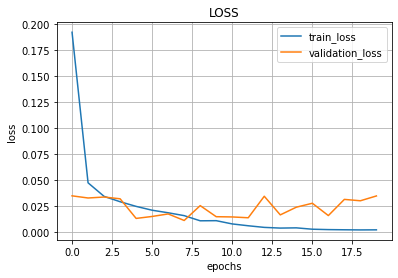

In [ ]:
plt.title("LOSS")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["loss"], label="train_loss")
plt.plot(result.history["val_loss"], label="validation_loss")
plt.legend(loc="best")

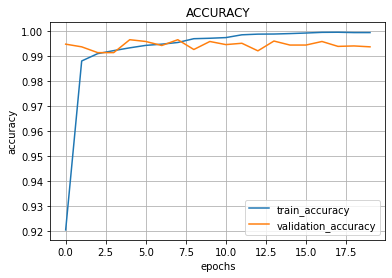

In [ ]:
plt.title("ACCURACY")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid()

plt.plot(result.history["accuracy"], label="train_accuracy")
plt.plot(result.history["val_accuracy"], label="validation_accuracy")
plt.legend(loc="best")

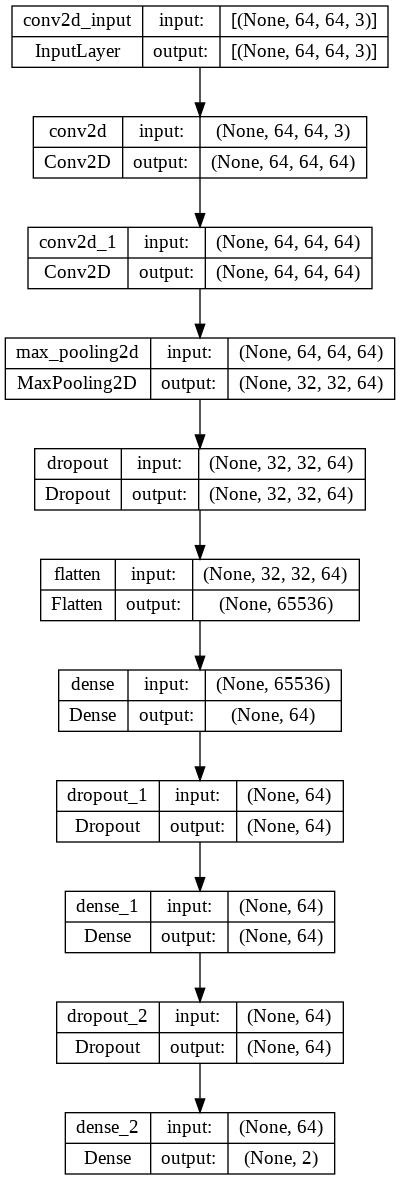

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model.png')